In [13]:
import data_helper_v3 as dh3

dataset_params = {"ts_window": 6, 
                "ts_overlap": "start", 
                "text_window": 3, 
                "text_selection_method": ("TFIDF", 5), 
                "data_source": {"name": "EDT", 
                    "text_path": "./data/EDT/evaluate_news.json", 
                    "ts_path": "./data/stock_emotions/price/", 
                    "ts_date_col": "Date", 
                    "text_date_col": "date", 
                    "text_col": "text", 
                    "train_dates": "01/01/2020 - 03/09/2020", 
                    "test_dates": "04/09/2020 - 31/12/2020"}, 
                "negatives_creation": ("sentence_transformer_dissimilarity", "max"), 
                "random_state": 44} 

model_params = {"ts_encoder": {"name": "TimeSeriesTransformerModel", "ts_window": 6, "context_length": 1, "prediction_length": 0, "lags_sequence": [1, 2, 3, 4, 5], "num_features": 3}, 
"text_encoder": {"name": "bert-base-uncased"}, 
"text_encoder_pretrained": True, 
"text_aggregation_method": "mean", 
"projection_dim": 500, 
"learning_rate": 1e-05, 
"optimizer": "adam", 
"criterion": "CosineEmbeddingLoss",
"num_epochs": 10, 
"batch_size": 6, 
"num_workers": 4}

df_list = dh3.get_data(text_tokenizer=None, 
                data_source=dataset_params['data_source'], 
                ts_window=dataset_params['ts_window'], 
                ts_mode=dataset_params['ts_overlap'], 
                text_window=dataset_params['text_window'], 
                text_selection_method=dataset_params['text_selection_method'], 
                negatives_creation=dataset_params['negatives_creation'], 
                batch_size=None, 
                num_workers=None, 
                loaders=False,
                subset_data=True,
                random_state=44)

C:\Users\eoinp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\eoinp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\eoinp\AppData

                                          ids ticker target_date_text_df  \
0                    [154113, 170317, 152463]    BAC          2020-03-17   
1                            [194636, 127255]    BAC          2020-03-24   
2                            [194636, 189151]    BAC          2020-03-25   
3                    [138840, 173896, 173064]    BAC          2020-03-30   
4            [121665, 173064, 178277, 173896]    BAC          2020-03-31   
..                                        ...    ...                 ...   
355          [121665, 173064, 178277, 173896]    BAC          2020-03-31   
356                  [136959, 154584, 160503]    BAC          2020-08-12   
357                                  [126316]    JNJ          2020-04-03   
358                                  [154113]    BAC          2020-03-19   
359  [118330, 108357, 186781, 141760, 115116]    JNJ          2020-08-18   

       end_date                                        text_series  \
0    2020-03-19  

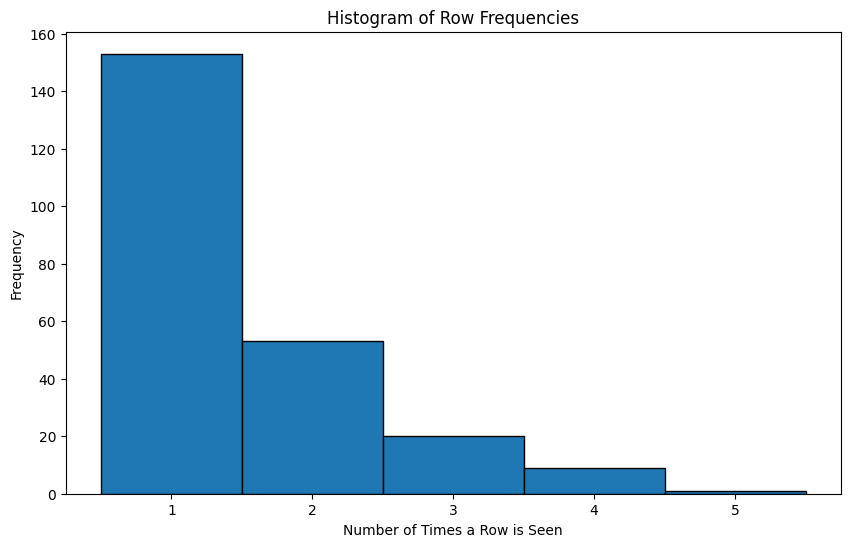

                                          ids ticker target_date_text_df  \
0                                    [115323]    BAC          2020-09-08   
1                                    [114033]    BAC          2020-09-09   
2    [114381, 112193, 108032, 106501, 109945]    BAC          2020-09-14   
3            [109945, 109141, 106501, 114381]    BAC          2020-09-16   
4                      [208220, 27247, 74826]    BAC          2020-09-30   
..                                        ...    ...                 ...   
209           [104087, 268508, 256445, 73950]    BAC          2020-12-08   
210                           [208220, 27247]    BAC          2020-10-01   
211                             [130, 202977]    JNJ          2020-10-09   
212                          [276991, 290274]    BAC          2020-11-23   
213                           [265302, 94467]    BAC          2020-11-11   

       end_date                                        text_series  \
0    2020-09-10  

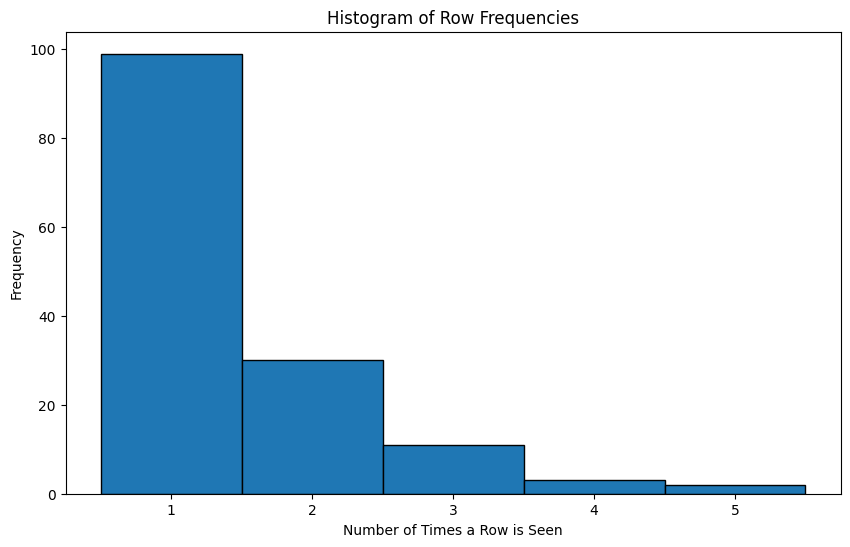

                               ids ticker target_date_text_df    end_date  \
0                         [111041]    BAC          2020-09-08  2020-09-10   
1         [114052, 115589, 107011]    BAC          2020-09-14  2020-09-16   
2                 [107011, 115589]    BAC          2020-09-15  2020-09-17   
3                 [208162, 207752]    BAC          2020-09-28  2020-09-30   
4    [207775, 8280, 205166, 59698]    BAC          2020-10-05  2020-10-07   
..                             ...    ...                 ...         ...   
197                        [62670]    BAC          2020-10-28  2020-10-30   
198       [218216, 256999, 249418]    BAC          2020-11-19  2020-11-21   
199       [218216, 256999, 249418]    BAC          2020-11-19  2020-11-21   
200                        [76579]    JNJ          2020-11-06  2020-11-08   
201         [282009, 12373, 26883]    BAC          2020-11-24  2020-11-26   

                                           text_series  \
0    [NEW YORK--(

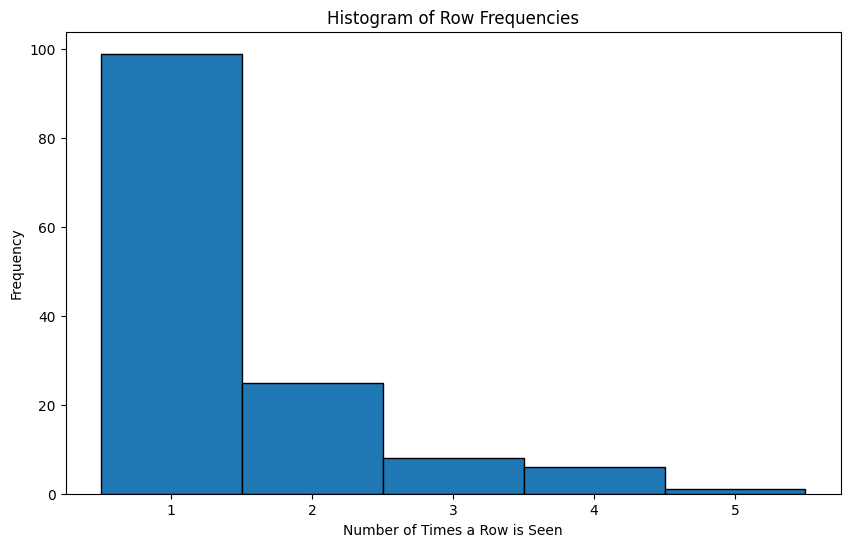

In [14]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def plot_num_unique(df):
    print(df)

    new_df = df[['text_series', 'label']]
    
    row_tuples = df['text_series'].apply(tuple)
    
    # Count occurrences of each unique row
    row_counts = row_tuples.value_counts()
    
    # Get the number of unique rows
    num_unique_rows = len(row_counts)
    print(f"Number of unique rows: {num_unique_rows}")
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(row_counts, bins=range(1, row_counts.max() + 2), align='left', edgecolor='black')
    plt.title('Histogram of Row Frequencies')
    plt.xlabel('Number of Times a Row is Seen')
    plt.ylabel('Frequency')
    plt.savefig("./data/hist_unique_textseries.png")
    plt.show()

    #new_df.to_csv("./data/neg_assessment_text_only.csv")
    #pdb.set_trace()

plot_num_unique(df_list[0])

plot_num_unique(df_list[1])

plot_num_unique(df_list[2])


In [ ]:
VADER is smart, handsome, and funny.----------------------------- {'pos': 0.746, 'compound': 0.8316, 'neu': 0.254, 'neg': 0.0}
VADER is smart, handsome, and funny!----------------------------- {'pos': 0.752, 'compound': 0.8439, 'neu': 0.248, 'neg': 0.0}
VADER is very smart, handsome, and funny.------------------------ {'pos': 0.701, 'compound': 0.8545, 'neu': 0.299, 'neg': 0.0}
VADER is VERY SMART, handsome, and FUNNY.------------------------ {'pos': 0.754, 'compound': 0.9227, 'neu': 0.246, 'neg': 0.0}
VADER is VERY SMART, handsome, and FUNNY!!!---------------------- {'pos': 0.767, 'compound': 0.9342, 'neu': 0.233, 'neg': 0.0}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!--------- {'pos': 0.706, 'compound': 0.9469, 'neu': 0.294, 'neg': 0.0}
VADER is not smart, handsome, nor funny.------------------------- {'pos': 0.0, 'compound': -0.7424, 'neu': 0.354, 'neg': 0.646}
The book was good.----------------------------------------------- {'pos': 0.492, 'compound': 0.4404, 'neu': 0.508, 'neg': 0.0}
At least it isn't a horrible book.------------------------------- {'pos': 0.363, 'compound': 0.431, 'neu': 0.637, 'neg': 0.0}
The book was only kind of good.---------------------------------- {'pos': 0.303, 'compound': 0.3832, 'neu': 0.697, 'neg': 0.0}
The plot was good, but the characters are uncompelling and the dialog is not great. {'pos': 0.094, 'compound': -0.7042, 'neu': 0.579, 'neg': 0.327}
Today SUX!------------------------------------------------------- {'pos': 0.0, 'compound': -0.5461, 'neu': 0.221, 'neg': 0.779}
Today only kinda sux! But I'll get by, lol----------------------- {'pos': 0.317, 'compound': 0.5249, 'neu': 0.556, 'neg': 0.127}
Make sure you :) or :D today!------------------------------------ {'pos': 0.706, 'compound': 0.8633, 'neu': 0.294, 'neg': 0.0}
Catch utf-8 emoji such as 💘 and 💋 and 😁-------------------- {'pos': 0.279, 'compound': 0.7003, 'neu': 0.721, 'neg': 0.0}
Not bad at all--------------------------------------------------- {'pos': 0.487, 'compound': 0.431, 'neu': 0.513, 'neg': 0.0}